<a href="https://colab.research.google.com/github/psagar123/RuralHeatIsland/blob/main/spatial_humidity_temp_apr_irr_noirr_daynight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This script can be used to calculate Wet Bulb Temperature (WBT), Mean Radiant Temperature (MRT) and Wet Bulb Globe Temperature (WBGT) using standard meteorological outputs from WRF model

#In particular, this file corresponds to humidity plot from irrigation and no-irrigation runs. Figure 7.

* The calculations are done using Thermofeel library which is developed by ECMWF. To know more about Thermofeel, feel free to read the paper below:
https://www.sciencedirect.com/science/article/pii/S2352711022000176#b18


* Thermofeel documentation is here:
https://thermofeel.readthedocs.io/en/latest/?

* Also a pdf of the documention can be found here:
https://thermofeel.readthedocs.io/_/downloads/en/latest/pdf/

* The Github repository of Thermofeel is located here:
https://github.com/ecmwf/thermofeel


In [ ]:
#These are all the libraries you will need to use this notebook
#https://github.com/ElsevierSoftwareX/SOFTX-D-21-00124/blob/master/examples/thermofeelexamplesourcecode1.py

!pip install thermofeel
!pip install netCDF4
import thermofeel
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
import thermofeel as tf

  Preparing metadata (setup.py) ... done
  Created wheel for thermofeel: filename=thermofeel-2.0.0-py3-none-any.whl size=19257 sha256=0795fc67384d0b16f31324921b9c4d761ae8c2dd0aa2502bb61bd1f3ed025212
  Stored in directory: /root/.cache/pip/wheels/13/ed/96/9273ffe8ffa6879082b70b5716fb2a46d4a6e6a7bbe408efca
Successfully built thermofeel
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.3 MB/s eta 0:00:00


In [ ]:
# Read model output data noirr

import netCDF4 as nc
from scipy.ndimage import shift
!pip install thermofeel
import thermofeel
import math
from thermofeel.helpers import (kelvin_to_fahrenheit)



# Read NetCDF files for lat and lon
lat_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new.nc')
long_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new.nc')
lat = lat_dataset['XLAT'][:]
lon = long_dataset['XLONG'][:]
print(lat.shape)
print(lon.shape)

# Relative humidity and dew point data were calculated with wrfout_to_cf_irr2_highrate2mm_realistic2_highrate.ncl script

# Read NetCDF file for relative humidity at 2m
rh_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new_rh2m.nc')
rh_20 = rh_dataset['rh2m'][:]; del rh_dataset;
print(rh_20.shape)
rh_20_apr_sensor = rh_20[168:888, :, :]; del rh_20;#
rh_20_apr_sensor = shift(rh_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
rh_reshape_apr_noirr = np.reshape(rh_20_apr_sensor, (24, 30, 171, 162), order='F');
del rh_20_apr_sensor;

# Read temperature
T2_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new.nc')
T2_20 = T2_dataset['t2'][:]; del T2_dataset;
print(T2_20.shape)
T2_20_apr_sensor = T2_20[168:888, :, :]; del T2_20;#
T2_20_apr_sensor = shift(T2_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
T2_reshape_apr_noirr = np.reshape(T2_20_apr_sensor, (24, 30, 171, 162), order='F');
del T2_20_apr_sensor;
T2_reshape_apr_noirr_f =  kelvin_to_fahrenheit(T2_reshape_apr_noirr);






(171, 162)
(171, 162)
(889, 171, 162)
(889, 171, 162)


In [ ]:
# Read model output data irr



# Read NetCDF file for relative humidity at 2m
rh_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new_rh2m_irr.nc')
rh_20 = rh_dataset['rh2m'][:]; del rh_dataset;
print(rh_20.shape)
rh_20_apr_sensor = rh_20[168:888, :, :]; del rh_20;#
rh_20_apr_sensor = shift(rh_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
rh_reshape_apr_irr = np.reshape(rh_20_apr_sensor, (24, 30, 171, 162), order='F');
del rh_20_apr_sensor;

# Read temperature
T2_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new_irr.nc')
T2_20 = T2_dataset['t2'][:]; del T2_dataset;
print(T2_20.shape)
T2_20_apr_sensor = T2_20[168:888, :, :]; del T2_20;#
T2_20_apr_sensor = shift(T2_20_apr_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
T2_reshape_apr_irr = np.reshape(T2_20_apr_sensor, (24, 30, 171, 162), order='F');
del T2_20_apr_sensor;
T2_reshape_apr_irr_f =  kelvin_to_fahrenheit(T2_reshape_apr_irr);


(889, 171, 162)
(889, 171, 162)


In [ ]:
# calculate difference of temperature

# temp day and night calculations

#first irrigation

T2_diurnal_apr_day_sensor_irr = T2_reshape_apr_irr_f[7:19, :, :, :];
T2_diurnal_apr_night_sensor_irr = T2_reshape_apr_irr_f[np.r_[0:7, 19:24], :, :, :];

T2_reshape_apr_irr_time_points_day = np.reshape(T2_diurnal_apr_day_sensor_irr, (360, 27702), order='F');
T2_reshape_apr_irr_time_points_night = np.reshape(T2_diurnal_apr_night_sensor_irr, (360, 27702), order='F');


T2_diurnal_apr_day_sensor_mn_irr = np.nanmean(T2_diurnal_apr_day_sensor_irr, axis=0);
T2_diurnal_apr_day_sensor_mn_mon_irr = np.nanmean(T2_diurnal_apr_day_sensor_mn_irr, axis=0);

T2_diurnal_apr_night_sensor_mn_irr = np.nanmean(T2_diurnal_apr_night_sensor_irr, axis=0);
T2_diurnal_apr_night_sensor_mn_mon_irr = np.nanmean(T2_diurnal_apr_night_sensor_mn_irr, axis=0);

# for no irr
T2_diurnal_apr_day_sensor_noirr = T2_reshape_apr_noirr_f[7:19, :, :, :];
T2_diurnal_apr_night_sensor_noirr = T2_reshape_apr_noirr_f[np.r_[0:7, 19:24], :, :, :];

T2_reshape_apr_noirr_time_points_day = np.reshape(T2_diurnal_apr_day_sensor_noirr, (360, 27702), order='F');
T2_reshape_apr_noirr_time_points_night = np.reshape(T2_diurnal_apr_night_sensor_noirr, (360, 27702), order='F');

T2_diurnal_apr_day_sensor_mn_noirr = np.nanmean(T2_diurnal_apr_day_sensor_noirr, axis=0);
T2_diurnal_apr_day_sensor_mn_mon_noirr = np.nanmean(T2_diurnal_apr_day_sensor_mn_noirr, axis=0);

T2_diurnal_apr_night_sensor_mn_noirr = np.nanmean(T2_diurnal_apr_night_sensor_noirr, axis=0);
T2_diurnal_apr_night_sensor_mn_mon_noirr = np.nanmean(T2_diurnal_apr_night_sensor_mn_noirr, axis=0);

T2_diff_diff_day = T2_diurnal_apr_day_sensor_mn_mon_irr-T2_diurnal_apr_day_sensor_mn_mon_noirr;
T2_diff_diff_night = T2_diurnal_apr_night_sensor_mn_mon_irr-T2_diurnal_apr_night_sensor_mn_mon_noirr;



In [ ]:
# calculate difference of humidity

# humidity day and night calculations

#first irrigation

rh_diurnal_apr_day_sensor_irr = rh_reshape_apr_irr[7:19, :, :, :];
rh_diurnal_apr_night_sensor_irr = rh_reshape_apr_irr[np.r_[0:7, 19:24], :, :, :];

rh_reshape_apr_irr_time_points_day = np.reshape(rh_diurnal_apr_day_sensor_irr, (360, 27702), order='F');
rh_reshape_apr_irr_time_points_night = np.reshape(rh_diurnal_apr_night_sensor_irr, (360, 27702), order='F');


rh_diurnal_apr_day_sensor_mn_irr = np.nanmean(rh_diurnal_apr_day_sensor_irr, axis=0);
rh_diurnal_apr_day_sensor_mn_mon_irr = np.nanmean(rh_diurnal_apr_day_sensor_mn_irr, axis=0);

rh_diurnal_apr_night_sensor_mn_irr = np.nanmean(rh_diurnal_apr_night_sensor_irr, axis=0);
rh_diurnal_apr_night_sensor_mn_mon_irr = np.nanmean(rh_diurnal_apr_night_sensor_mn_irr, axis=0);

# for no irr
rh_diurnal_apr_day_sensor_noirr = rh_reshape_apr_noirr[7:19, :, :, :];
rh_diurnal_apr_night_sensor_noirr = rh_reshape_apr_noirr[np.r_[0:7, 19:24], :, :, :];

rh_reshape_apr_noirr_time_points_day = np.reshape(rh_diurnal_apr_day_sensor_noirr, (360, 27702), order='F');
rh_reshape_apr_noirr_time_points_night = np.reshape(rh_diurnal_apr_night_sensor_noirr, (360, 27702), order='F');

rh_diurnal_apr_day_sensor_mn_noirr = np.nanmean(rh_diurnal_apr_day_sensor_noirr, axis=0);
rh_diurnal_apr_day_sensor_mn_mon_noirr = np.nanmean(rh_diurnal_apr_day_sensor_mn_noirr, axis=0);

rh_diurnal_apr_night_sensor_mn_noirr = np.nanmean(rh_diurnal_apr_night_sensor_noirr, axis=0);
rh_diurnal_apr_night_sensor_mn_mon_noirr = np.nanmean(rh_diurnal_apr_night_sensor_mn_noirr, axis=0);

rh_diff_diff_day = rh_diurnal_apr_day_sensor_mn_mon_irr-rh_diurnal_apr_day_sensor_mn_mon_noirr;
rh_diff_diff_night = rh_diurnal_apr_night_sensor_mn_mon_irr-rh_diurnal_apr_night_sensor_mn_mon_noirr;



In [ ]:
!pip install cartopy
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker

# Load the county and lake shapefiles
counties = gpd.read_file("/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp")
salton = gpd.read_file("/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/Salton_geog/Salton_geog.shp")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 17.9 MB/s eta 0:00:00


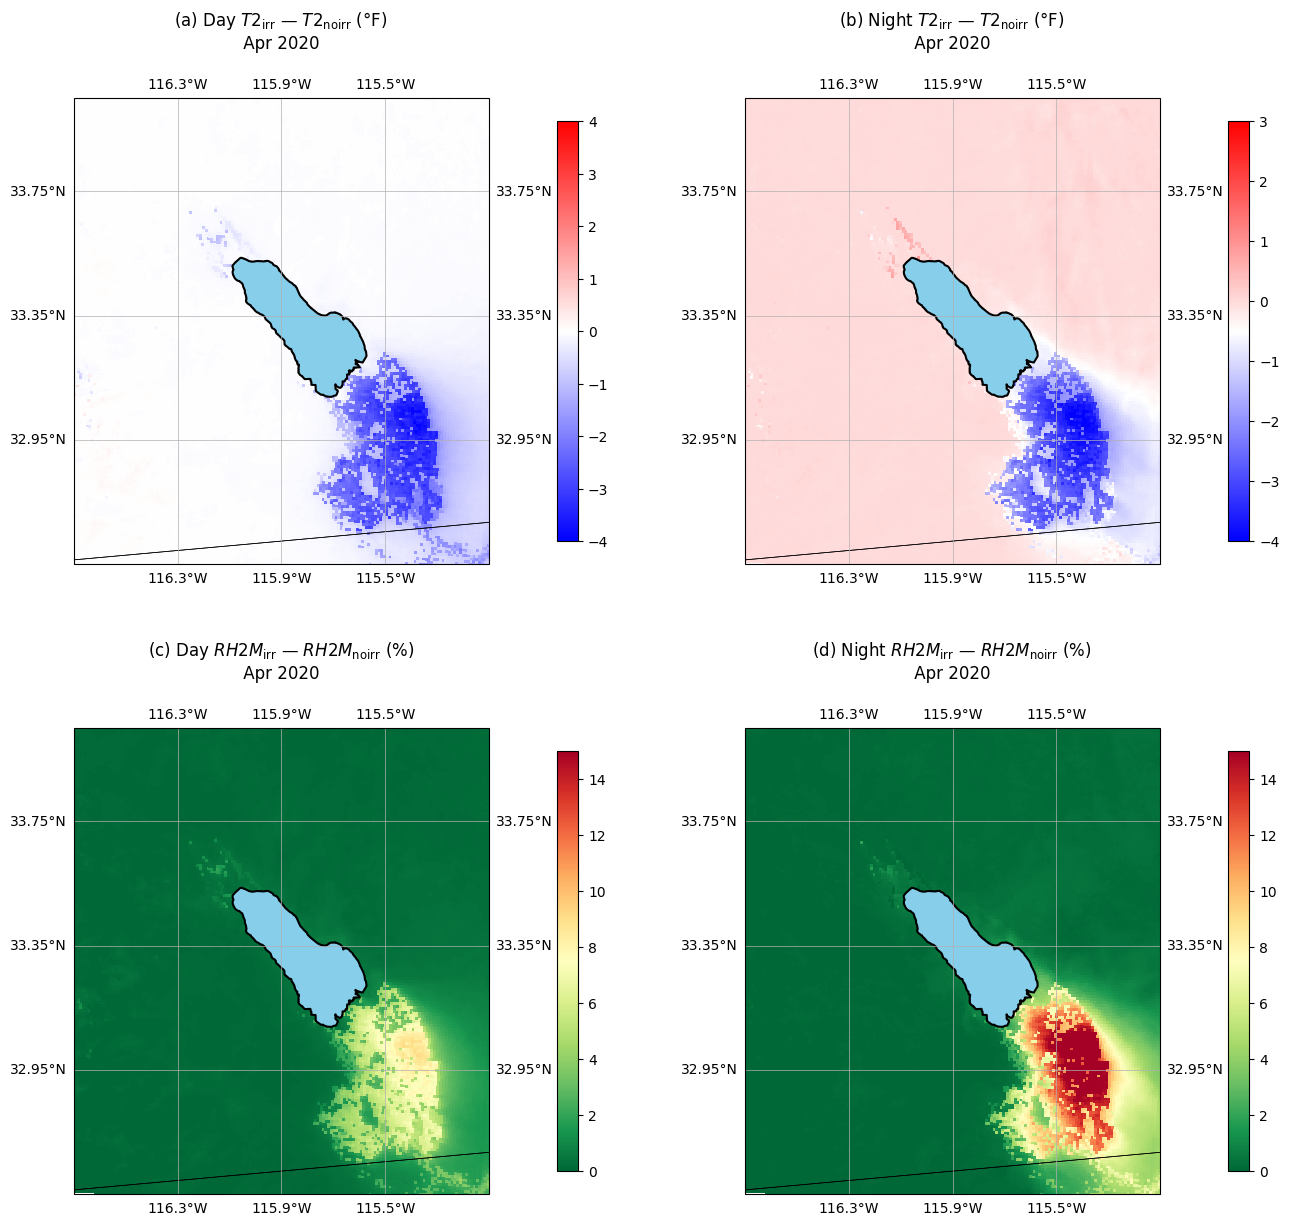

In [ ]:
# plot daily mean difference for irr and noirr day and night for both temp and hum

# plot daily mean humidity and temperature for day and night

fig, ((ax_1, ax_2), (ax_3, ax_4)) = plt.subplots(2, 2, figsize=(16, 15), subplot_kw={'projection': ccrs.PlateCarree()}, gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1, 1]})
plt.subplots_adjust(wspace=0.18, hspace=0.2)  # Adjust the width space between subplots

# First subplot
ax_1.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_1 = ax_1.pcolormesh(lon, lat, T2_diff_diff_day, cmap='bwr', vmin=-4, vmax=4)
counties.plot(ax=ax_1, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_1, linewidth=1.5, color='black', facecolor='skyblue')
ax_1.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_1.set_title('(a) Day $T2_{\\mathrm{irr}}$ \u2014 $T2_{\\mathrm{noirr}}$ (\u00b0F) \n Apr 2020 \n');
cbar_1 = plt.colorbar(mesh_1, ax=ax_1, shrink=0.8, pad=0.12)

# second subplot
ax_2.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_2 = ax_2.pcolormesh(lon, lat, T2_diff_diff_night, cmap='bwr', vmin=-4, vmax=3)
counties.plot(ax=ax_2, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_2, linewidth=1.5, color='black', facecolor='skyblue')
ax_2.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_2.set_title('(b) Night $T2_{\\mathrm{irr}}$ \u2014 $T2_{\\mathrm{noirr}}$ (\u00b0F) \n Apr 2020 \n');
cbar_2 = plt.colorbar(mesh_2, ax=ax_2, shrink=0.8, pad=0.12)

# third subplot
ax_3.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_3 = ax_3.pcolormesh(lon, lat, rh_diff_diff_day, cmap='RdYlGn_r', vmin=0, vmax=15)
counties.plot(ax=ax_3, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_3, linewidth=1.5, color='black', facecolor='skyblue')
ax_3.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_3.set_title('(c) Day $RH2M_{\\mathrm{irr}}$ \u2014 $RH2M_{\\mathrm{noirr}}$ (%) \n Apr 2020 \n');
cbar_3 = plt.colorbar(mesh_3, ax=ax_3, shrink=0.8, pad=0.12)

# fourth subplot
ax_4.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_4 = ax_4.pcolormesh(lon, lat, rh_diff_diff_night, cmap='RdYlGn_r', vmin=0, vmax=15)
counties.plot(ax=ax_4, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_4, linewidth=1.5, color='black', facecolor='skyblue')
ax_4.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_4.set_title('(d) Night $RH2M_{\\mathrm{irr}}$ \u2014 $RH2M_{\\mathrm{noirr}}$ (%) \n Apr 2020 \n');
cbar_4 = plt.colorbar(mesh_4, ax=ax_4, shrink=0.8, pad=0.12)

#plt.savefig('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/Figures/spatial_diff_temp_hum_day_night_irr_noirr.png', bbox_inches='tight', dpi=300)

#display the plot
plt.show()



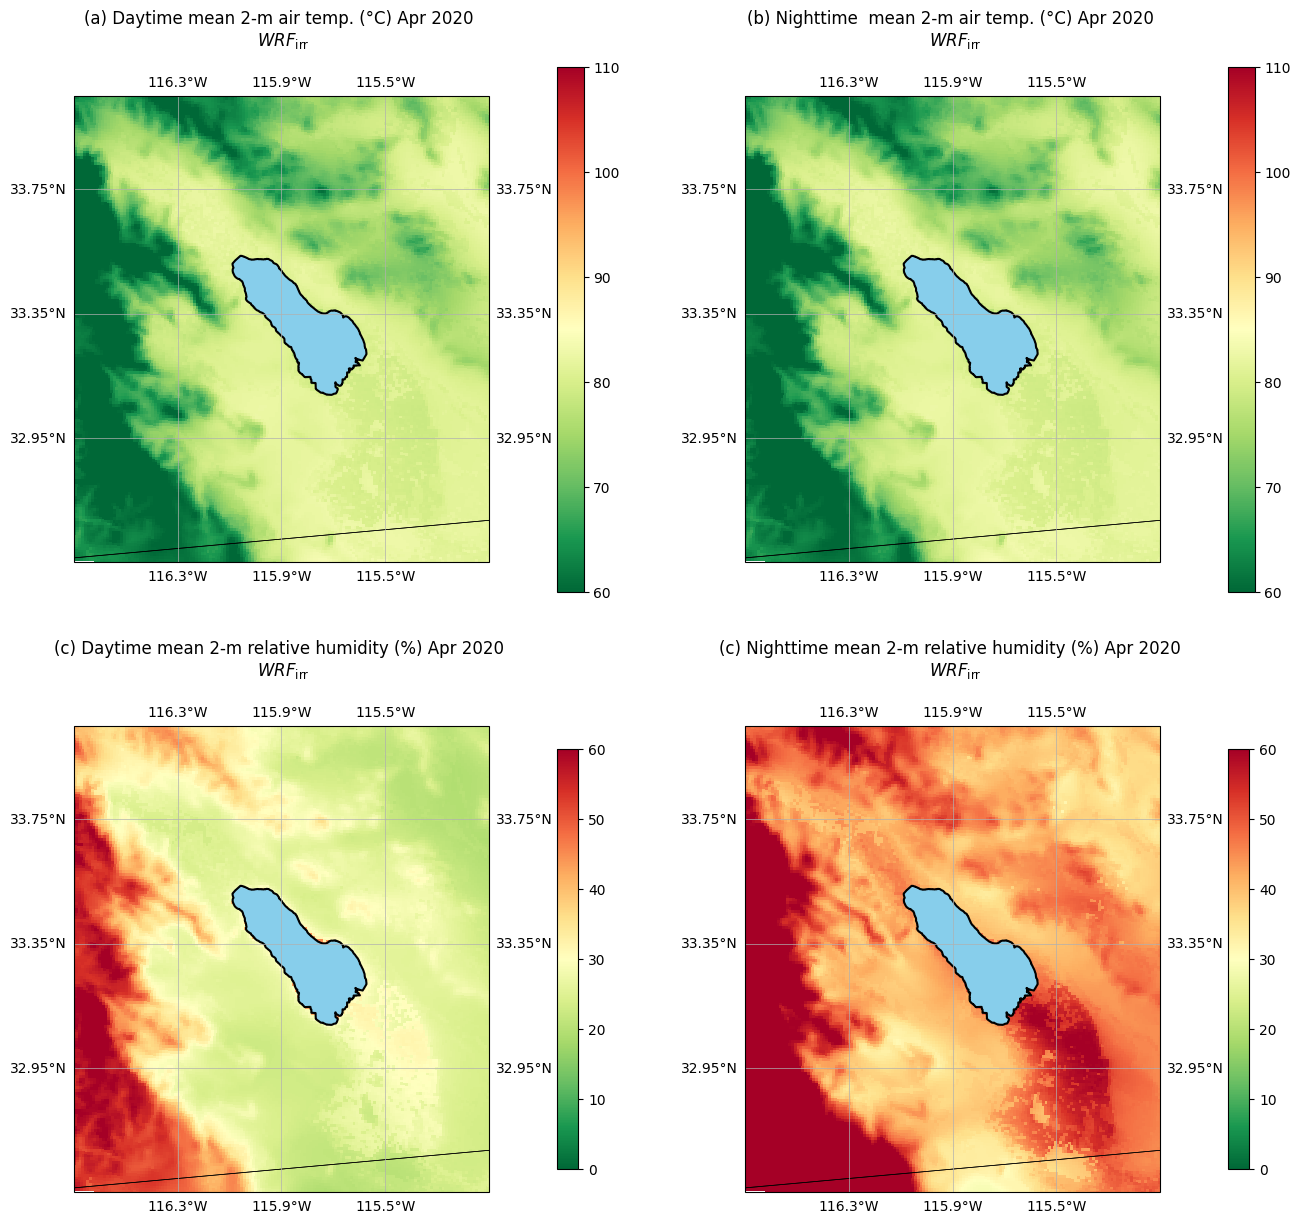

In [ ]:
# plot daily mean humidity and temperature for day and night

fig, ((ax_1, ax_2), (ax_3, ax_4)) = plt.subplots(2, 2, figsize=(16, 15), subplot_kw={'projection': ccrs.PlateCarree()}, gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1, 1]})
plt.subplots_adjust(wspace=0.18, hspace=0.2)  # Adjust the width space between subplots

# First subplot
ax_1.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_1 = ax_1.pcolormesh(lon, lat, T2_diurnal_apr_day_sensor_mn_mon_irr, cmap='RdYlGn_r', vmin=60, vmax=110)
counties.plot(ax=ax_1, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_1, linewidth=1.5, color='black', facecolor='skyblue')
ax_1.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_1.set_title('(a) Daytime mean 2-m air temp. (\u00b0C) Apr 2020 \n $WRF_{\mathrm{irr}}$ \n');
cbar_1 = plt.colorbar(mesh_1, ax=ax_1, shrink=1, pad=0.12)

# Second subplot
ax_2.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_2 = ax_2.pcolormesh(lon, lat, T2_diurnal_apr_day_sensor_mn_mon_irr, cmap='RdYlGn_r',  vmin=60, vmax=110)
counties.plot(ax=ax_2, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_2, linewidth=1.5, color='black', facecolor='skyblue')
ax_2.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_2.set_title('(b) Nighttime  mean 2-m air temp. (\u00b0C) Apr 2020 \n $WRF_{\mathrm{irr}}$ \n');
cbar_2 = plt.colorbar(mesh_2, ax=ax_2, shrink=1, pad=0.12)

# third subplot
ax_3.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_3 = ax_3.pcolormesh(lon, lat, rh_diurnal_apr_day_sensor_mn_mon_irr, cmap='RdYlGn_r', vmin=0, vmax=60)
counties.plot(ax=ax_3, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_3, linewidth=1.5, color='black', facecolor='skyblue')
ax_3.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_3.set_title('(c) Daytime mean 2-m relative humidity (%) Apr 2020 \n $WRF_{\\mathrm{irr}}$ \n');
cbar_3 = plt.colorbar(mesh_3, ax=ax_3, shrink=0.8, pad=0.12)

# fourth subplot
ax_4.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_4 = ax_4.pcolormesh(lon, lat, rh_diurnal_apr_night_sensor_mn_mon_irr, cmap='RdYlGn_r', vmin=0, vmax=60)
counties.plot(ax=ax_4, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_4, linewidth=1.5, color='black', facecolor='skyblue')
ax_4.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_4.set_title('(c) Nighttime mean 2-m relative humidity (%) Apr 2020 \n $WRF_{\\mathrm{irr}}$ \n');
cbar_4 = plt.colorbar(mesh_4, ax=ax_4, shrink=0.8, pad=0.12)

#plt.savefig('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/Figures/spatial_airtemp_hum_day_night_april.png', bbox_inches='tight', dpi=300)

#display the plot
plt.show()

